<a href="https://colab.research.google.com/github/seungmei/ESAA_24_1/blob/main/0520%EC%9B%94%EA%B3%BC%EC%A0%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_ch3_4%2C_6~7_87p~_95p%2C_105p~115p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0520월과제 파이썬 딥러닝 텐서플로 ch3.4, 6~7 87p-95p, 105p-115p

## 4. 모델 세부 설정

In [1]:
from keras.datasets import mnist
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data() 로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max() #max: 255
x_test = x_test / x_test.max() #max:255

11490434/11490434 [==============================] - 0s 0us/step
train set:  (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


### 4-1 초기값 설정
- 레이어의 초기화 방법을 다르게도 설정 可.
  - dense 레이어는 기본 초기화 방법으로 glorot uniform 초기화 방법이 설정되어 있음.

In [2]:
dense = tf.keras.layers.Dense(256, activation="relu")
dense.get_config()["kernel_initializer"]

{'module': 'keras.initializers',
 'class_name': 'GlorotUniform',
 'config': {'seed': None},
 'registered_name': None}

- 기본값 설정 glorotuniform을 HeNormal로 변경하자. <~ kernel_initializer 매개변수에 설정.


In [3]:
# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer="he_normal", activation ="relu")
print(dense.get_config()["kernel_initializer"])

# 클래스 인스터스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation="relu")
print(dense.get_config()["kernel_initializer"])

{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}
{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}


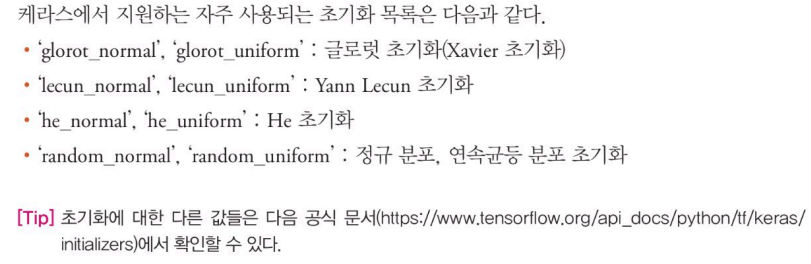

### 4-2 규제 regularization

In [4]:
# 기본값
dense = tf.keras.layers.Dense(256, activation="relu")
dense.get_config()

{'name': 'dense_3',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'module': 'keras.initializers',
  'class_name': 'GlorotUniform',
  'config': {'seed': None},
  'registered_name': None},
 'bias_initializer': {'module': 'keras.initializers',
  'class_name': 'Zeros',
  'config': {},
  'registered_name': None},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

- 모델이 과대적합하는 것을 방지해주기 위해 모델을 구성하는 레이어마다 규제를 적용할 수 있음.
  - 케라스에서 l1, l2 규제 지원 <~ kernel_regularizer에 규제 지정

In [5]:
# L1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer="l1", activation="relu")
print(dense.get_config()["kernel_regularizer"])

# 클래스 인스턴스 적용. alpha=0.1 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation="relu")
print(dense.get_config()["kernel_regularizer"])

{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.009999999776482582}, 'registered_name': None}
{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.10000000149011612}, 'registered_name': None}


### 4-3 드롭아웃 dropout
- "Droupout: A Simple Way to Prevent Neural Networks from Overfitting' 논문에서 제안된 아이디어.
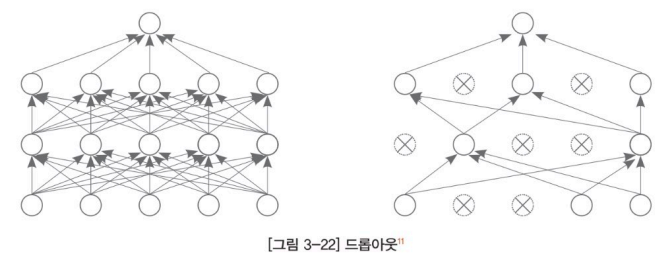

- 딥러닝 모델의 층이 넓고 깊어질 때, 훈련에 주어진 샘플에 과하게 적합 학습하는 경향이 있음. -> 훈련할 때 만나지 못한 새로운 데이터에 대해 좋지 않은 예측력. => 드롭아웃: 모델의 과대적합 문제 해결.
- 노드 中 확률적으로 몇 개의 신호를 끊으면 모델이 쉽게 과대적합 되는 것을 방지 可.
∵모델이 학습하는 가중치 파라미터의 개수가 현저히 ↓.


In [6]:
# Dropout 25% 비율 적용 (25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

### 4-4 배치 정규화 Batch Normalization
- 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화. 다음 층으로 데이터가 전달되기 전에 스케일을 조정하기 때문에 보다 안정적인 훈련이 가능하고 성능을 크게 향상 가능.
- 배치 정규화 층은 케라스에서 클래스 함수로 지원하기 때문에 별도로 코드 구현할 必要 없. 클래스 인스턴스를 생성하여 추가.

In [7]:
# Model A: Dense+ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Model B: Dense+BatchNorm+ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation("relu"),

    tf.keras.layers.Dense(32),
     # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation("relu"),

    tf.keras.layers.Dense(10,activation="softmax")

])

model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

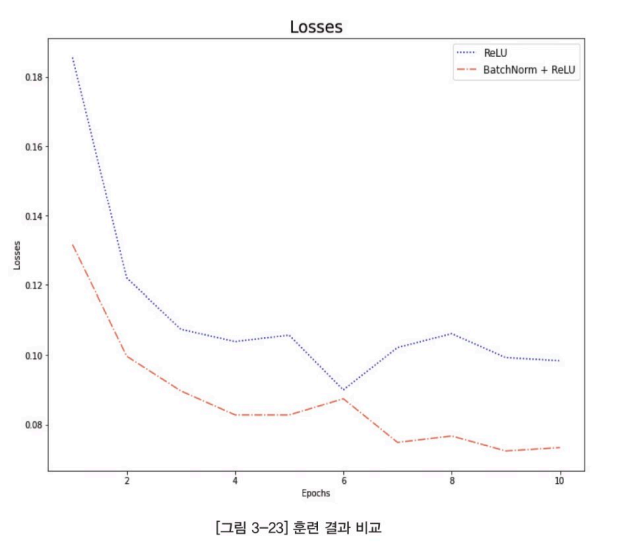

- 배치 정규화만 추가해도 손실이 이전 대비 더 안정적이고 빠르게 수렴함.
- 복잡한 데이터셋일수록 배치 정규화 유무가 모델 성능에 큰 영향.

### 4-5 활성화 activation 함수

In [9]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [10]:
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
     # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10,activation="softmax"),

])

model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                     

In [11]:
model_a.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_b.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_c.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Model A: Dense+ ReLU
history_a = model_a.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10)

# Model B: Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10)

# Model C: Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2965 - accuracy: 0.9147 - val_loss: 0.1488 - val_accuracy: 0.9576
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1353 - accuracy: 0.9595 - val_loss: 0.1206 - val_accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0980 - accuracy: 0.9698 - val_loss: 0.1056 - val_accuracy: 0.9680
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0766 - accuracy: 0.9762 - val_loss: 0.1015 - val_accuracy: 0.9693
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0628 - accuracy: 0.9811 - val_loss: 0.0919 - val_accuracy: 0.9729
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0531 - accuracy: 0.9834 - val_loss: 0.0901 - val_accuracy: 0.9731
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0448 - accuracy: 0.9852 - val_loss: 0.0975 - val_accuracy

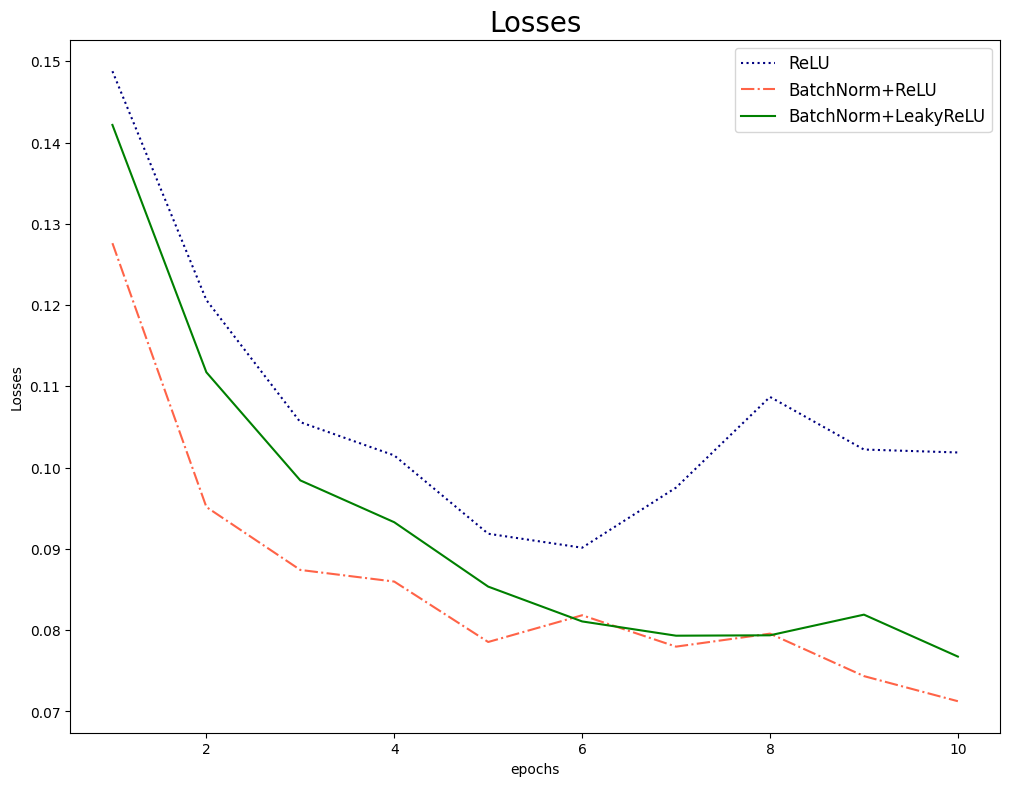

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,9))
plt.plot(np.arange(1,11), history_a.history["val_loss"],color="navy",linestyle=":")
plt.plot(np.arange(1,11), history_b.history["val_loss"],color="tomato",linestyle="-.")
plt.plot(np.arange(1,11), history_c.history["val_loss"],color="green",linestyle="-")

plt.title("Losses",fontsize=20)
plt.xlabel("epochs")
plt.ylabel("Losses")
plt.legend(["ReLU","BatchNorm+ReLU","BatchNorm+LeakyReLU"],fontsize=12)
plt.show()

## 6. 모델 저장 및 불러오기

### 6-1 모델을 파일로 저장
- 훈련을 종료하여 가중치가 업데이트된 모델 인스턴스 저장 可.
  - HDF5 포맷
  - SavedModel 포

In [15]:
# 모델 c를 h5 포맷으로 저장
model_c.save("h5-model.h5")

### 6-2 저장된 모델 복원

In [16]:
h5_model = tf.keras.models.load_model("h5-model.h5")
h5_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                     

In [17]:
# 모델 검증
loss,acc = h5_model.evaluate(x_test,y_test,verbose=0)
print(f"h5model] loss:{loss:.5f}.acc:{acc:.5f}")

h5model] loss:0.07674.acc:0.97660


In [18]:
# 모델 C를 SavedModel 포맷으로 저장
model_c.save("saved-model")

In [19]:
# 모델 복원
saved_model = tf.keras.models.load_model("saved-model")
saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                     

In [20]:
# 모델 검증 - HDF5 포맷
loss,acc = h5_model.evaluate(x_test,y_test,verbose=0)
print(f"h5model] loss:{loss:.5f}.acc:{acc:.5f}")

# 모델 검증 - SavedModel 포맷
loss,acc = saved_model.evaluate(x_test,y_test,verbose=0)
print(f"saved_model] loss:{loss:.5f}.acc:{acc:.5f}")

h5model] loss:0.07674.acc:0.97660
saved_model] loss:0.07674.acc:0.97660


## 7. 복잡한 모델 생성

### 7-1 함수형 API Functional API
- 함수 형태로 딥러닝 모델을 정의하면 다양한 모델 구조 구현 可.
- 여러 층을 시퀀스 형태로 연결하는 Sequential API와 다르게, Functional API는 복잡한 구조의 모델을 정의 可.
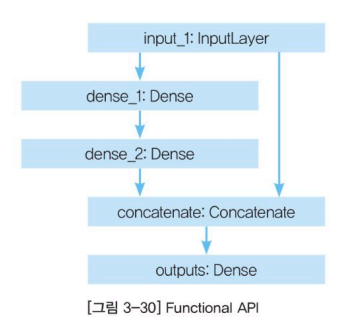

함수형 API를 사용하기 위해서는 먼저 input 레이어 정의. ~> input 레이어에 데이터의 입력 shape 정의 ~> 레이어마다 반환되는 출력 값을 변수에 저장한 뒤 다음 레이어의 입력으로 연결. ~> 이런 식으로 여러 개의 레이어를 마치 체인 구조로 입출력을 계속 연결 可.

In [21]:
# 모델의 레이어를 체인 구조로 연결 Input 레이어 정의
input_layer = tf.keras.Input(shape=(28,28), name="InputLayer")

# 모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name="Flatten")(input_layer)
x2 = tf.keras.layers.Dense(256,activation="relu",name="Dense1")(x1)
x3 = tf.keras.layers.Dense(64,activation="relu",name="Dense2")(x2)
x4 = tf.keras.layers.Dense(10,activation="softmax",name="OutputLayer")(x3)

In [23]:
# 모델 생성
# input 매개변수로 입력층인 input_layer 지정. output 매개변수에 출력층 지정. name 매개변수에 이름 지정.
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name="FunctionalModel")

# 모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


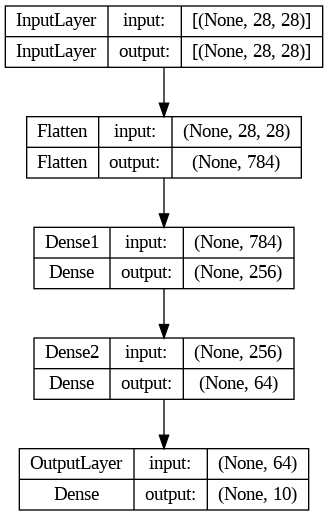

In [24]:
# 복잡한 구조를 갖는 모델을 생성할 때는 summary()보다 plot_model 모듈을 활용하여 모델의 구조 시각화
from tensorflow.keras.utils import plot_model

plot_model(func_model, show_shapes=True, show_layer_names=True, to_file="model.png")

In [25]:
func_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

func_model.fit(x_train,y_train, epochs=3)

loss, acc = func_model.evaluate(x_test,y_test,verbose=0)
print(f"func_model] loss:{loss:.5f}.acc:{acc:.5f}")

Epoch 1/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2193 - accuracy: 0.9354
Epoch 2/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0885 - accuracy: 0.9726
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0612 - accuracy: 0.9805
func_model] loss:0.07223.acc:0.97670


### 7-2 모델 서브클래싱 Model Subclassing
- 텐서플로 케라스는 Model 클래스를 제공하고, 이를 기반으로 딥러닝 모델을 구현하고 있음. 이 클래스를 직접 상속받아 사용자가 직접 서브클래스로 딥러닝 모델 만들 수 있음.
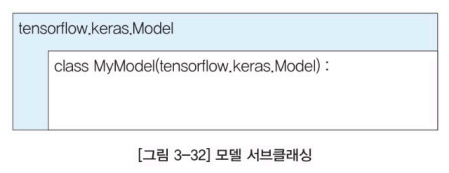

In [27]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel,self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256,activation="relu")
        self.dense2 = tf.keras.layers.Dense(64,activation="relu")
        self.dense3 = tf.keras.layers.Dense(10,activation="softmax")

    # method overiding
    # 훈련용 함수 정의
    # x는 input
    ''' call() 함수를 메소드 오버라이딩으로 구현.
    call() 메소드 fit() 메소드가 호출되어 훈련하는 경우 호출될 함수.
    call() 함수 내부에서는 모델의 입력부터 출력까지의 흐름, 즉 순전파 정의하고 함수형 API와 같은 방식으로
    모든 레이어를 체인처럼 연결. 마지막으로 최종 출력 값을 return '''
    def call(self,x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [28]:
# 모델 생성
mymodel = MyModel()

# 모델의 이름 설정
mymodel._name = "subclass_model"

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 dense_15 (Dense)            multiple                  200960    
                                                                 
 dense_16 (Dense)            multiple                  16448     
                                                                 
 dense_17 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# 컴파일
mymodel.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# 훈련
mymodel.fit(x_train,y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test,y_test,verbose=0)
print(f"Subclassing Model]loss:{loss:.5f}.acc:{acc:.5f}")
''' Model Subclassing으로 생성된 모델의 훈련도 동일하게 compile()메소드로 컴파일 후
fit() 메소드로 훈련. ; 함수형 API로 생성한 모델과 Model Subclassing으로 생성한 모델 모두 동일한
compile()메소드와 fit() 메소드로 훈련 可.
evaluate() 메소드로 모델 성능 검증 可'''

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2163 - accuracy: 0.9352
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0892 - accuracy: 0.9727
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0614 - accuracy: 0.9804
Subclassing Model]loss:0.06948.acc:0.97830


### 7-3 서브클래싱 모델 파라미터를 활용한 생성


In [30]:
# 모델의 생성자 파라미터를 추가하여 동적으로 레리어의 유닛 개수 초기화 예제
class MyModel(tf.keras.Model):

    # 생성자 파라미터 추가
    def __init__(self, units, num_classes):
        super(MyModel,self).__init__()
        #초기값 설정
        # unit의 개수를 입력받아 Dense 레이어의 유닛 개수를 계산하여 설정.
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units,activation="relu")
        self.dense2 = tf.keras.layers.Dense(units/4,activation="relu")
        self.dense3 = tf.keras.layers.Dense(num_classes,activation="softmax")

    # class overiding
    # 훈련용 함수 정의
    # x는 input
    def call(self,x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [31]:
# 모델 생성
mymodel = MyModel(256,10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()
## 동적으로 설ㅈ어한 레이어의 파라미터가 초기화됐음을 확인 可.

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_18 (Dense)            multiple                  200960    
                                                                 
 dense_19 (Dense)            multiple                  16448     
                                                                 
 dense_20 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# 컴파일
mymodel.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# 훈련
mymodel.fit(x_train,y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test,y_test,verbose=0)
print(f"Subclassing Model w.parameters]loss:{loss:.5f}.acc:{acc:.5f}")

Epoch 1/3
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2169 - accuracy: 0.9354
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0895 - accuracy: 0.9724
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0610 - accuracy: 0.9807
Subclassing Model w.parameters]loss:0.08859.acc:0.97330
